10142993


C:\Users\edwar\AppData\Local\Temp\ipykernel_5020\529233688.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rating'] = df_filtered['rating'].apply(lambda x: 1 if x >= 4.0 else 0)


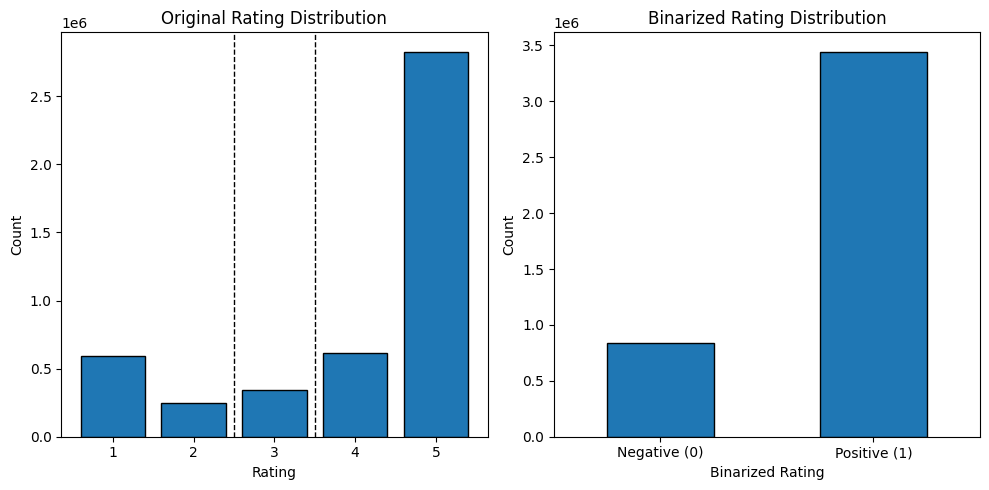

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/edwar/SocialPositivityData/AmazonData/amazon_video_games.csv')
df2 = pd.read_csv('C:/Users/edwar/SocialPositivityData/AmazonData/amazon_musical_instruments.csv')
df3 = pd.read_csv('C:/Users/edwar/SocialPositivityData/AmazonData/amazon_fashion.csv')
print(len(df) + len(df2) + len(df3))
plt.figure(figsize=(10, 5))

# Plot the original distribution of ratings
plt.subplot(1, 2, 1)
df['rating'].hist(bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', align='mid', rwidth=0.8)
plt.grid(False)
plt.xticks([1, 2, 3, 4, 5])  #
plt.axvline(x=2.5, color='black', linestyle='dashed', linewidth=1) 
plt.axvline(x=3.5, color='black', linestyle='dashed', linewidth=1)  
plt.title('Original Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

# Filter out rows where the rating is 3.0
df_filtered = df[df['rating'] != 3.0]

# Change the rating values based on the conditions
df_filtered['rating'] = df_filtered['rating'].apply(lambda x: 1 if x >= 4.0 else 0)


plt.subplot(1, 2, 2)
df_filtered['rating'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Binarized Rating Distribution')
plt.xlabel('Binarized Rating')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'], rotation=0)  # Horizontal x-labels
plt.tight_layout()
plt.show()

In [ ]:
average_recommendation = df.groupby('asin')['rating'].mean().reset_index()
average_recommendation.rename(columns={'rating': 'average_recommendation_score'}, inplace=True)

df = df.merge(average_recommendation, on='asin', how='left')


In [ ]:
review_count = df.groupby('asin').size().reset_index(name='review_count')
df = df.merge(review_count, on='asin', how='left')
df = df[df['review_count'] >= 9]

rating_variance = df.groupby('asin')['rating'].var().reset_index(name='rating_variance')
df = df.merge(rating_variance, on='asin', how='left')
df = df[df['rating_variance'] >= 0.05]

In [ ]:
df_poor = df[df['average_recommendation_score'] < 0.5]
df_rich = df[df['average_recommendation_score'] >= 0.5]
print(len(df_poor))
print(len(df_rich))

In [ ]:
# df_poor.to_csv('C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Datasets/Amazon/amazon_fashion_poor.csv', index=False)
df_rich.to_csv('C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Datasets/Amazon/amazon_video_games_rich.csv', index=False)


In [ ]:
# Concatenate
df1 = pd.read_csv("C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Datasets/Amazon/amazon_video_games_rich.csv")
df2 = pd.read_csv("C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Datasets/Amazon/amazon_rich.csv")

df_combined = pd.concat([df1, df2], ignore_index=True)

df_combined.to_csv("C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Datasets/Amazon/amazon_rich.csv", index=False)

In [ ]:
import matplotlib.pyplot as plt

num_unique_poor = df_poor.nunique().sum()
num_unique_rich = df_rich.nunique().sum()

categories = ['Poor', 'Rich']
values = [num_unique_poor, num_unique_rich]

plt.figure(figsize=(6, 4))
plt.bar(categories, values, color=['red', 'green'])
plt.xlabel("Environment")
plt.ylabel("Number of products")
plt.title("Number of Products in poor and rich environment")
plt.show()

In [ ]:
import seaborn as sns
df_poor = pd.read_csv('C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Datasets/Amazon/amazon_poor_filtered.csv')
asin_avg_score = df_poor.groupby('asin')['average_recommendation_score'].mean().reset_index()


plt.figure(figsize=(10, 5))
sns.scatterplot(data=asin_avg_score, x='asin', y='average_recommendation_score', alpha=0.7)
plt.xticks([])  
plt.xlabel("ASIN")
plt.ylabel("Average Recommendation Score")
plt.title("Scatter Plot of ASIN vs. Average Recommendation Score (1)")
plt.show()

In [ ]:

df_rich = pd.read_csv('C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Datasets/Amazon/amazon_rich.csv')
asin_avg_score = df_poor.groupby('asin')['average_recommendation_score'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=asin_avg_score, x='asin', y='average_recommendation_score', alpha=0.7)
plt.xticks([])  
plt.xlabel("ASIN")
plt.ylabel("Average Recommendation Score")
plt.title("Scatter Plot of ASIN vs. Average Recommendation Score (1)")
plt.show()